In [1]:
import pandas as pd
import numpy as np
import os
import plotly.express as px
import plotly.graph_objects as go
import time
import typing 

import jdatetime

In [2]:
path = "/run/media/mefi/2662B94962B91E8D/Mefi/University/Term 6/Regression Analysis/RA_P1/data/traffic"

### total_est_normal chart

In [3]:
import os
import pandas as pd
import plotly.express as px

def drawchart(num):
    base_path = os.path.join(path, "nowruz_02")
    file1 = os.path.join(base_path, f"{num}.csv")
    file2 = os.path.join(base_path, f"{num + 50}.csv")

    # Read both files
    df1 = pd.read_csv(file1)
    df2 = pd.read_csv(file2)

    # Optional: ensure date is string for consistent merging/sorting
    df1['date'] = df1['date'].astype(str)
    df2['date'] = df2['date'].astype(str)

    # Rename value columns to distinguish between the two
    name1 = df1['name'].iloc[0] if 'name' in df1.columns else f"{num}"
    name2 = df2['name'].iloc[0] if 'name' in df2.columns else f"{num + 50}"
    df1 = df1[['date', 'total_est_normal']].rename(columns={'total_est_normal': name1})
    df2 = df2[['date', 'total_est_normal']].rename(columns={'total_est_normal': name2})

    # Merge the two DataFrames on 'date'
    merged = pd.merge(df1, df2, on='date', how='outer').sort_values('date')

    # Melt to long format for Plotly
    df_long = merged.melt(id_vars='date', var_name='name', value_name='total_est_normal')

    # Plot
    fig = px.line(
        df_long,
        x='date',
        y='total_est_normal',
        color='name',
        title='تعداد سواری در روز، نوروز ۱۴۰۲',
        markers=False
    )

    fig.update_layout(
        legend_title='نام محور',
        xaxis_title='تاریخ',
        xaxis_type='category',
        yaxis_title='تعداد',
        template='plotly_white',
        hovermode='x unified',
    )

    fig.show()

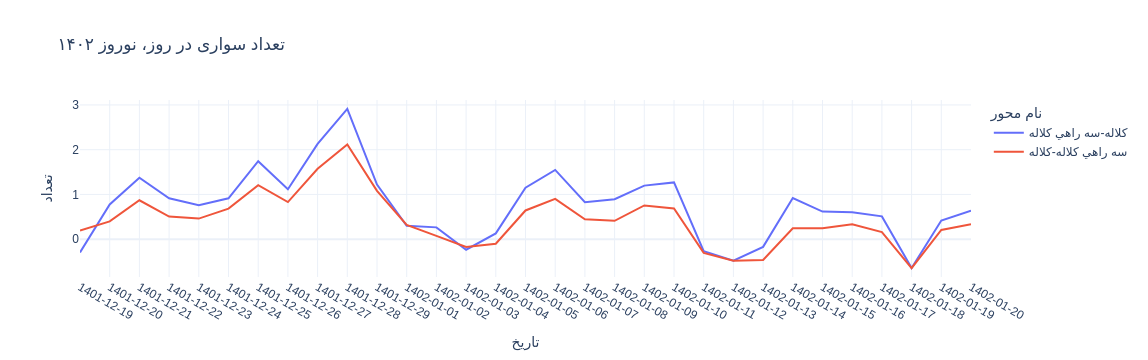

974203.csv
invalid literal for int() with base 10: ''


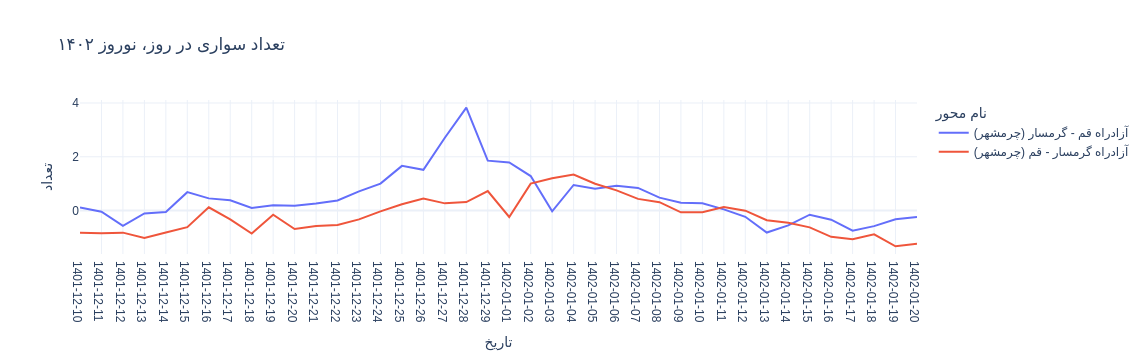

113201.csv


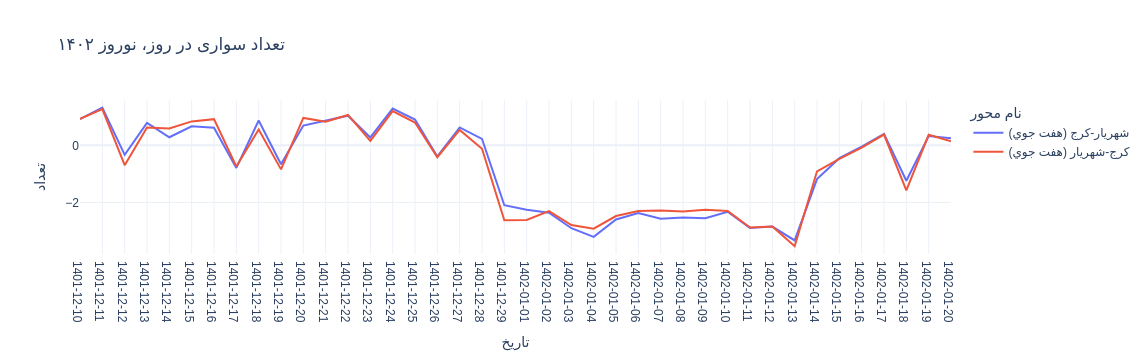

113202.csv


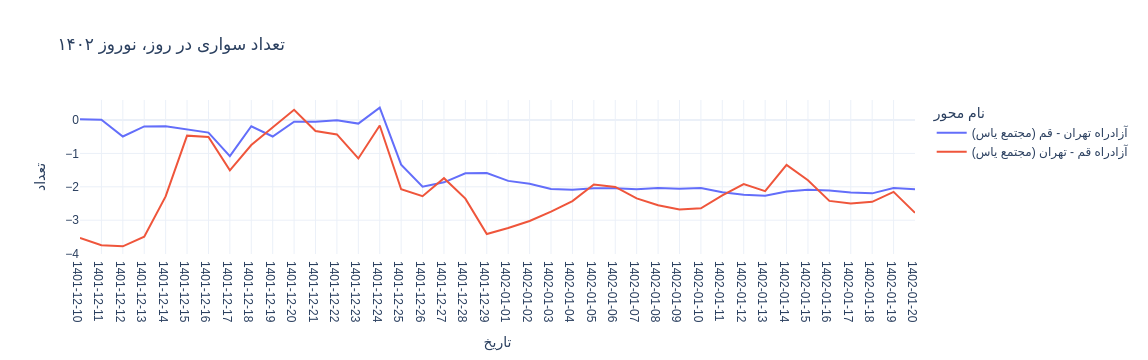

113203.csv


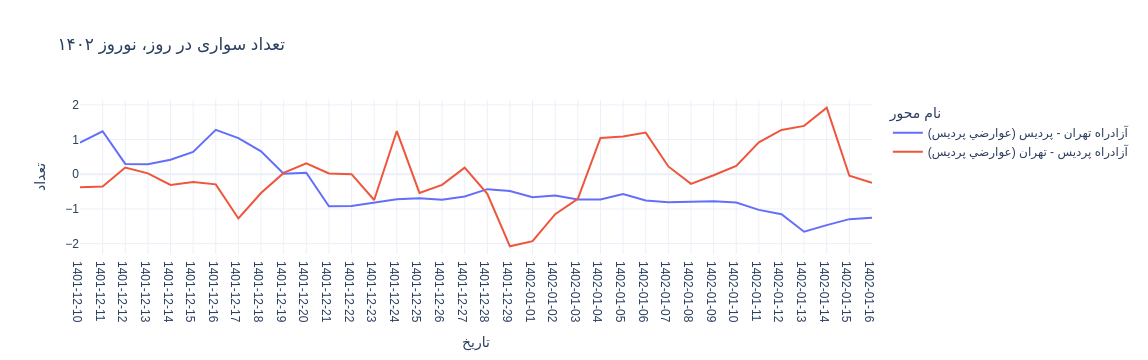

113206.csv


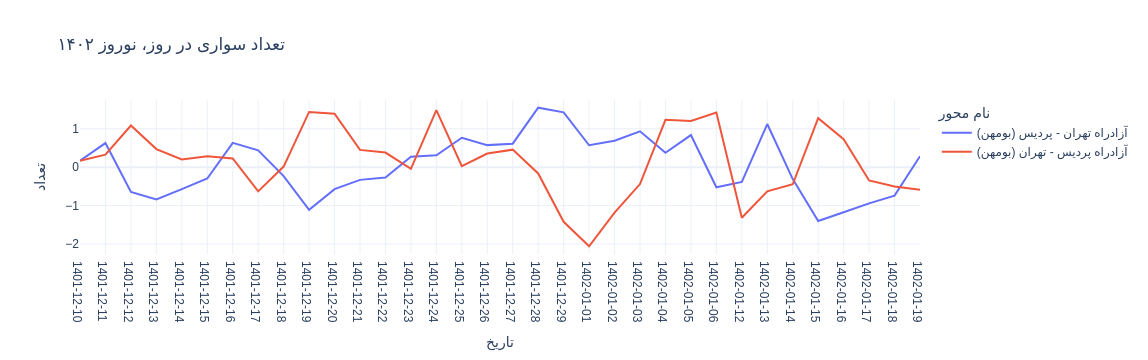

113207.csv


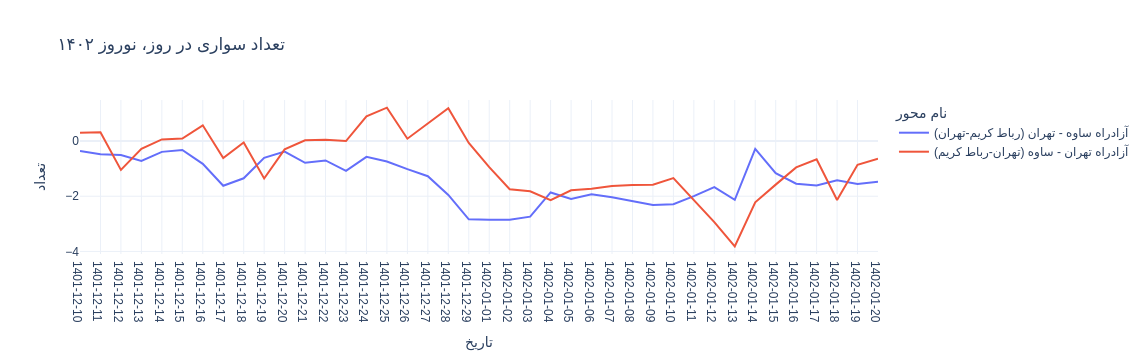

113208.csv
[Errno 2] No such file or directory: '/run/media/mefi/2662B94962B91E8D/Mefi/University/Term 6/Regression Analysis/RA_P1/data/traffic/nowruz_02/113209.csv'


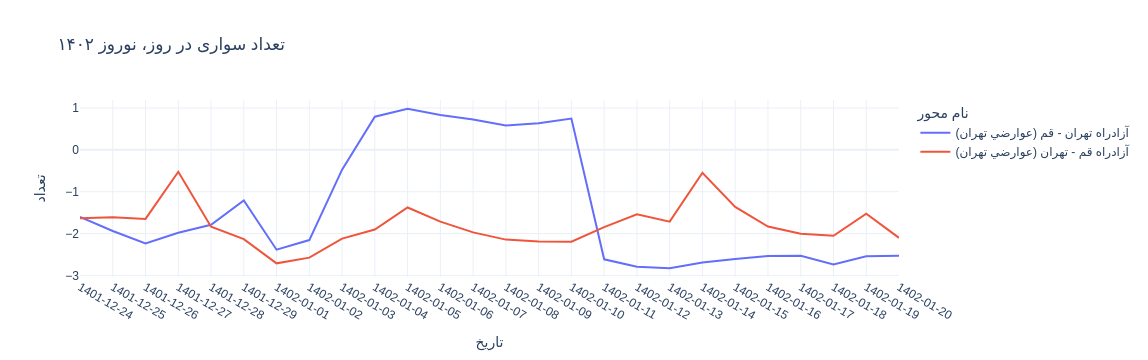

113210.csv


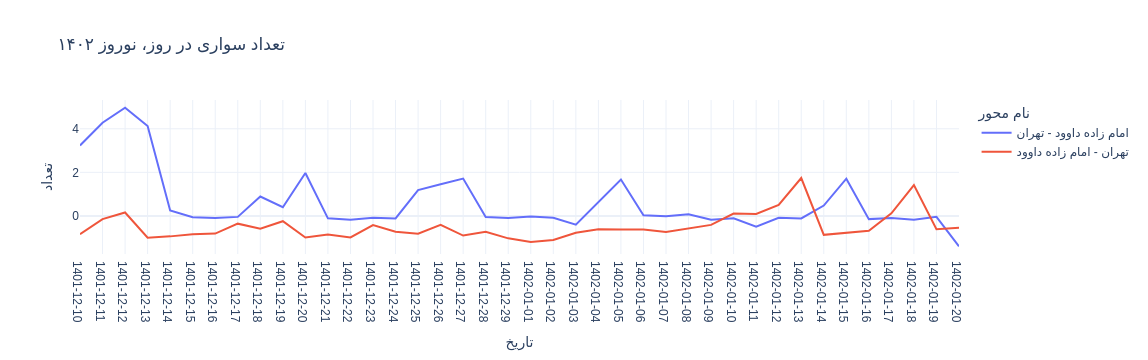

113212.csv


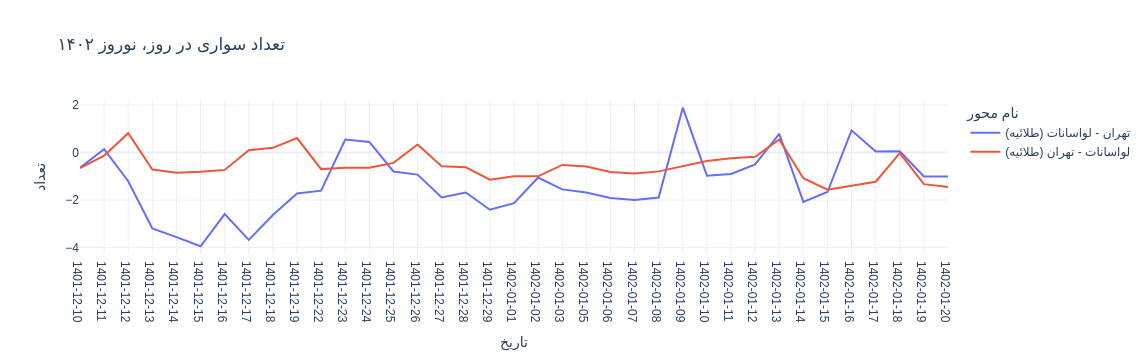

113213.csv


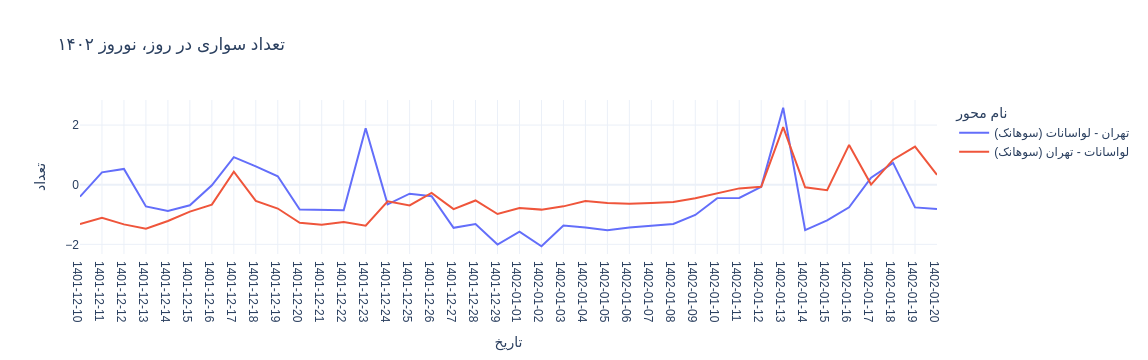

113214.csv


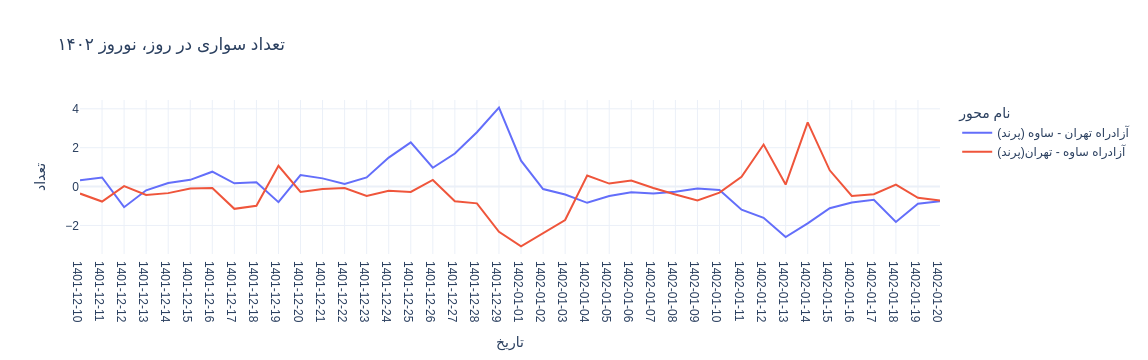

113228.csv
[Errno 2] No such file or directory: '/run/media/mefi/2662B94962B91E8D/Mefi/University/Term 6/Regression Analysis/RA_P1/data/traffic/nowruz_02/113279.csv'


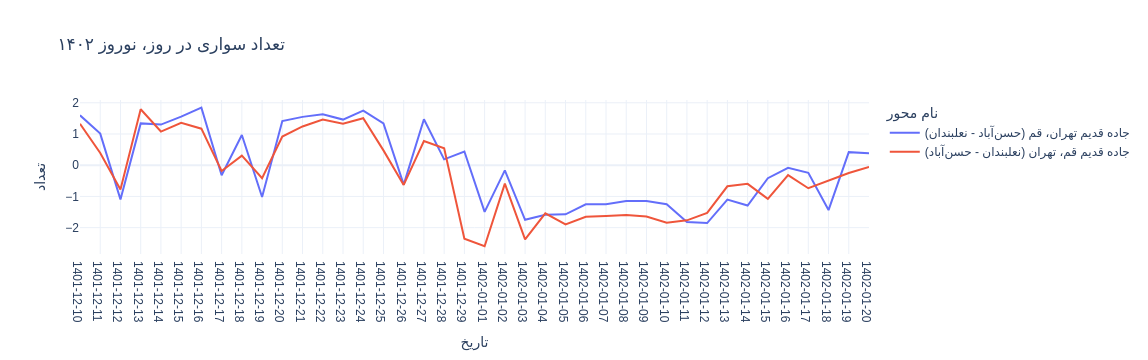

113243.csv


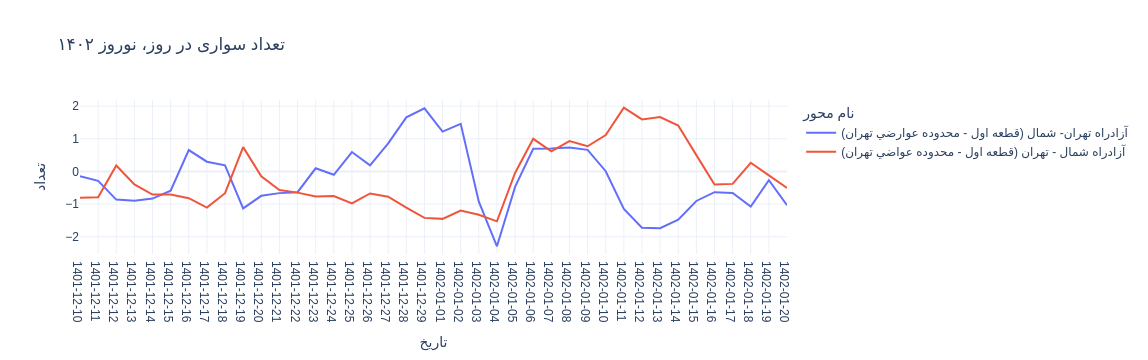

113249.csv


In [15]:
start = 20
end = 40

for idx, f in enumerate(os.listdir(os.path.join(path, "nowruz_03"))):
    if (start <= idx and idx < end):
        try:
            number = int(f.split(".")[0])
            if number % 100 < 50:
                drawchart(int(f.split(".")[0]))
                print(f)
        except Exception as exc:
            print(exc)
    

### Export total_est_normal above 2

In [5]:
path02 = os.path.join(path, "nowruz_02")
path03 = os.path.join(path, "nowruz_03")

df02 = pd.DataFrame()

def summarize(df: pd.DataFrame) -> pd.DataFrame:    
    df = df[abs(df["total_est_normal"]) >= 2]
    result = df.groupby('code')['date'].agg(list).reset_index()
    return result

for idx, f in enumerate(os.listdir(path02)):
    df_file = pd.read_csv(os.path.join(path02, f))
    df_file["code"] = df_file["code"].astype(str)
    if df02.empty:
        df02 = summarize(df_file)
    else:
        df02 = pd.concat([df02, summarize(df_file)])

df02.rename(columns={"date": "nowruz_02"}, inplace=True)

df03 = pd.DataFrame()

for idx, f in enumerate(os.listdir(path03)):
    df_file = pd.read_csv(os.path.join(path03, f))
    df_file["code"] = df_file["code"].astype(str)
    if df03.empty:
        df03 = summarize(df_file)
    else:
        df03 = pd.concat([df03, summarize(df_file)])

df03.rename(columns={"date": "nowruz_03"}, inplace=True)

df = pd.merge(df02, df03, how='outer', on='code')

df.to_csv("./peaks.csv", sep="|")